In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import Draw, PandasTools

from pathlib import Path

In [2]:
pd.options.display.max_columns = 50

In [4]:
data = pd.read_csv('data_descriptors.csv', index_col=0)
data.head()

,molecule_chembl_id,Ki,units,pKi,smiles,mols,maccs,mw,fsp3,n_lipinski_hba,n_lipinski_hbd,n_rings,n_hetero_atoms,n_heavy_atoms,n_rotatable_bonds,tpsa,qed,clogp,sas,n_aliphatic_carbocycles,n_aliphatic_heterocyles,n_aliphatic_rings,n_aromatic_carbocycles,n_aromatic_heterocyles,n_aromatic_rings,n_saturated_carbocycles,n_saturated_heterocyles,n_saturated_rings
0,CHEMBL132806,57.0,nM,7.24,CC(C)CCn1cc2c(nc(NC(=O)Cc3ccccc3)n3nc(-c4ccco4...,<rdkit.Chem.rdchem.Mol object at 0x0000018B5EA...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,429.191323,0.260870,9,1,5,9,32,7,103.14,0.420000,3.9613,2.785385,0,0,0,1,4,5,0,0,0
1,CHEMBL336217,42.0,nM,7.38,CC(C)CCn1cc2c(nc(NC(=O)Cc3cccc4ccccc34)n3nc(-c...,<rdkit.Chem.rdchem.Mol object at 0x0000018B5EA...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,479.206973,0.222222,9,1,6,9,36,7,103.14,0.341105,5.1145,2.869417,0,0,0,2,4,6,0,0,0
2,CHEMBL134566,60.0,nM,7.22,O=C(Cc1ccccc1)Nc1nc2nn(CCCc3ccccc3)cc2c2nc(-c3...,<rdkit.Chem.rdchem.Mol object at 0x0000018B5EA...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,477.191323,0.148148,9,1,6,9,36,8,103.14,0.345039,4.5480,2.702531,0,0,0,2,4,6,0,0,0
3,CHEMBL435022,38.0,nM,7.42,CC(C)CCn1cc2c(nc(NC(=O)COc3ccccc3)n3nc(-c4ccco...,<rdkit.Chem.rdchem.Mol object at 0x0000018B5EA...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,445.186238,0.260870,10,1,5,10,33,8,112.37,0.386515,3.7976,2.792537,0,0,0,1,4,5,0,0,0
4,CHEMBL341376,423.0,nM,6.37,Cn1cc2c(nc(NC(=O)Cc3ccccc3)n3nc(-c4ccco4)nc23)n1,<rdkit.Chem.rdchem.Mol object at 0x0000018B5EA...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,373.128723,0.105263,9,1,5,9,28,4,103.14,0.518988,2.4522,2.681130,0,0,0,1,4,5,0,0,0


In [5]:
data.drop(columns=['mols', 'maccs'], inplace=True)
data.head()

,molecule_chembl_id,Ki,units,pKi,smiles,mw,fsp3,n_lipinski_hba,n_lipinski_hbd,n_rings,n_hetero_atoms,n_heavy_atoms,n_rotatable_bonds,tpsa,qed,clogp,sas,n_aliphatic_carbocycles,n_aliphatic_heterocyles,n_aliphatic_rings,n_aromatic_carbocycles,n_aromatic_heterocyles,n_aromatic_rings,n_saturated_carbocycles,n_saturated_heterocyles,n_saturated_rings
0,CHEMBL132806,57.0,nM,7.24,CC(C)CCn1cc2c(nc(NC(=O)Cc3ccccc3)n3nc(-c4ccco4...,429.191323,0.260870,9,1,5,9,32,7,103.14,0.420000,3.9613,2.785385,0,0,0,1,4,5,0,0,0
1,CHEMBL336217,42.0,nM,7.38,CC(C)CCn1cc2c(nc(NC(=O)Cc3cccc4ccccc34)n3nc(-c...,479.206973,0.222222,9,1,6,9,36,7,103.14,0.341105,5.1145,2.869417,0,0,0,2,4,6,0,0,0
2,CHEMBL134566,60.0,nM,7.22,O=C(Cc1ccccc1)Nc1nc2nn(CCCc3ccccc3)cc2c2nc(-c3...,477.191323,0.148148,9,1,6,9,36,8,103.14,0.345039,4.5480,2.702531,0,0,0,2,4,6,0,0,0
3,CHEMBL435022,38.0,nM,7.42,CC(C)CCn1cc2c(nc(NC(=O)COc3ccccc3)n3nc(-c4ccco...,445.186238,0.260870,10,1,5,10,33,8,112.37,0.386515,3.7976,2.792537,0,0,0,1,4,5,0,0,0
4,CHEMBL341376,423.0,nM,6.37,Cn1cc2c(nc(NC(=O)Cc3ccccc3)n3nc(-c4ccco4)nc23)n1,373.128723,0.105263,9,1,5,9,28,4,103.14,0.518988,2.4522,2.681130,0,0,0,1,4,5,0,0,0


In [6]:
columns = list(data.columns)[5:]
columns

['mw',
 'fsp3',
 'n_lipinski_hba',
 'n_lipinski_hbd',
 'n_rings',
 'n_hetero_atoms',
 'n_heavy_atoms',
 'n_rotatable_bonds',
 'tpsa',
 'qed',
 'clogp',
 'sas',
 'n_aliphatic_carbocycles',
 'n_aliphatic_heterocyles',
 'n_aliphatic_rings',
 'n_aromatic_carbocycles',
 'n_aromatic_heterocyles',
 'n_aromatic_rings',
 'n_saturated_carbocycles',
 'n_saturated_heterocyles',
 'n_saturated_rings']

In [15]:
plt.rcParams['figure.max_open_warning'] = 30

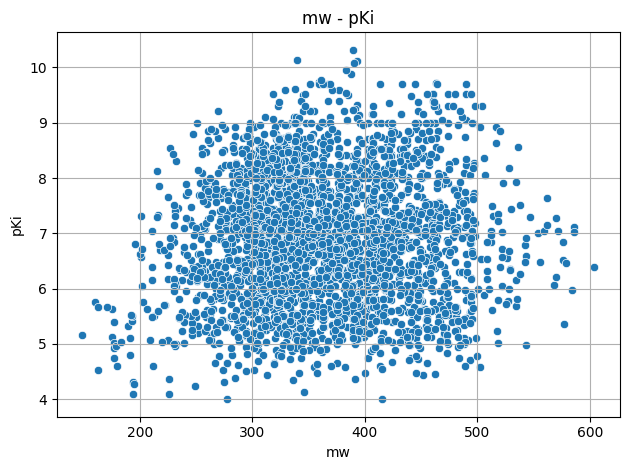

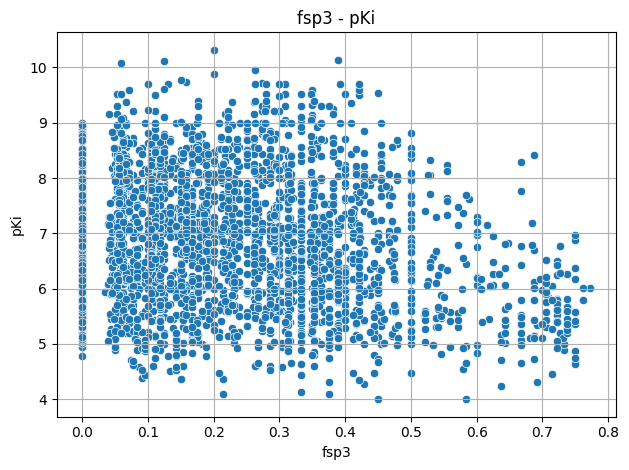

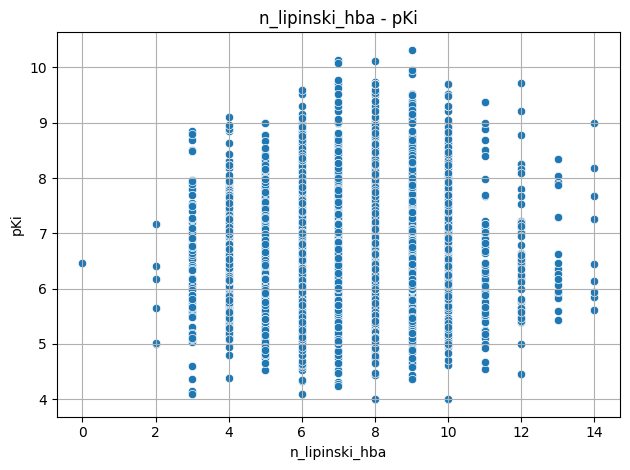

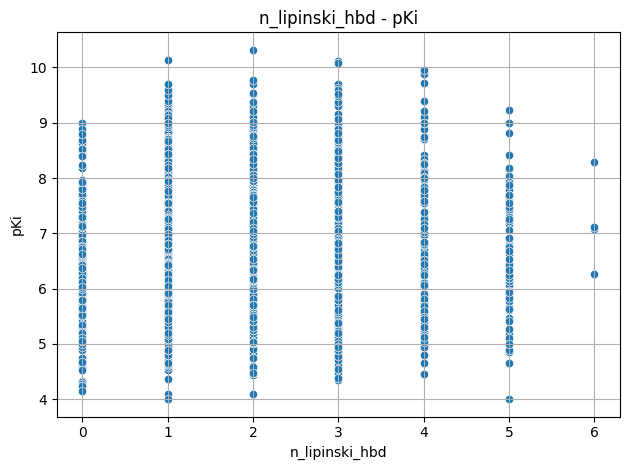

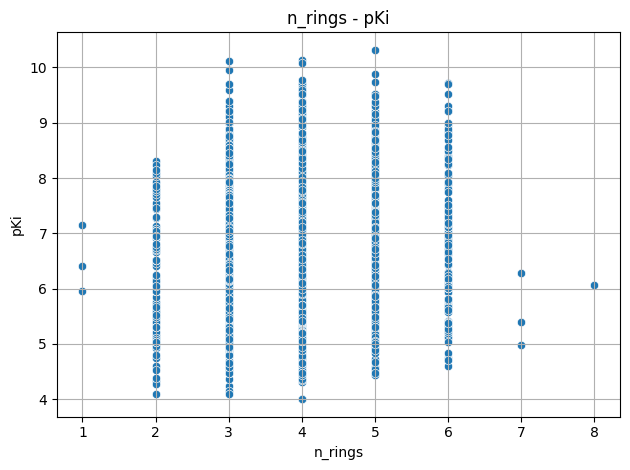

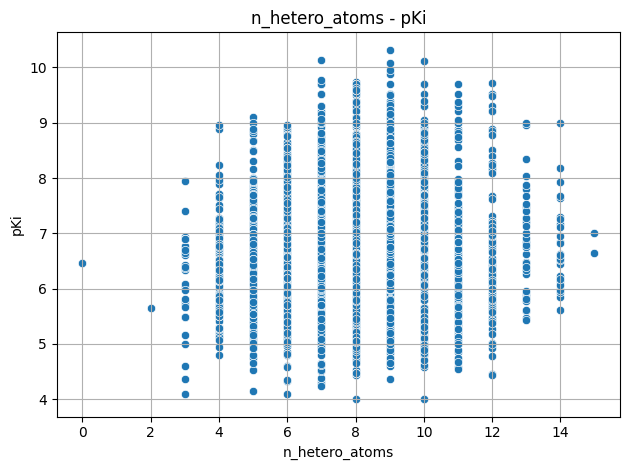

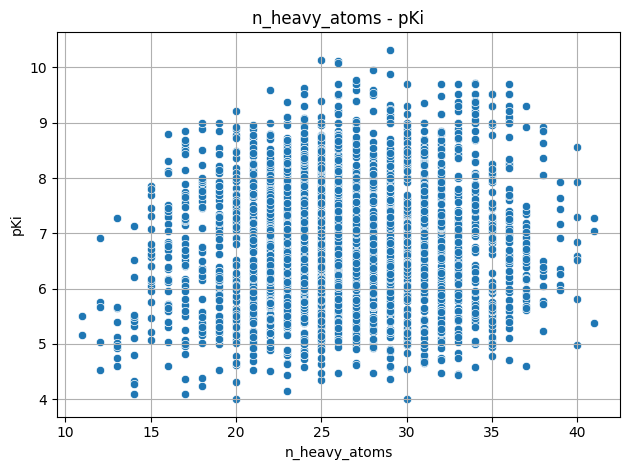

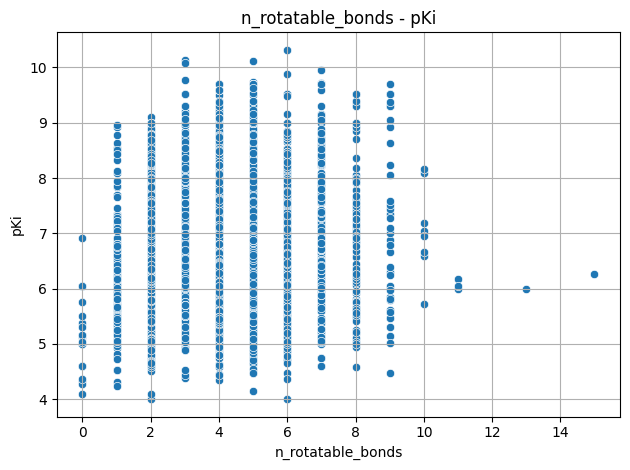

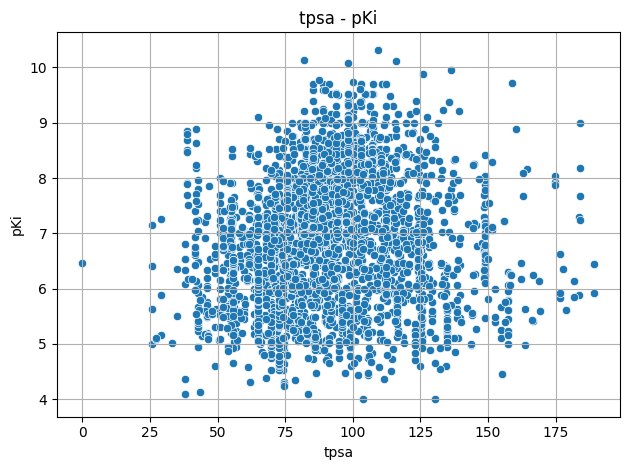

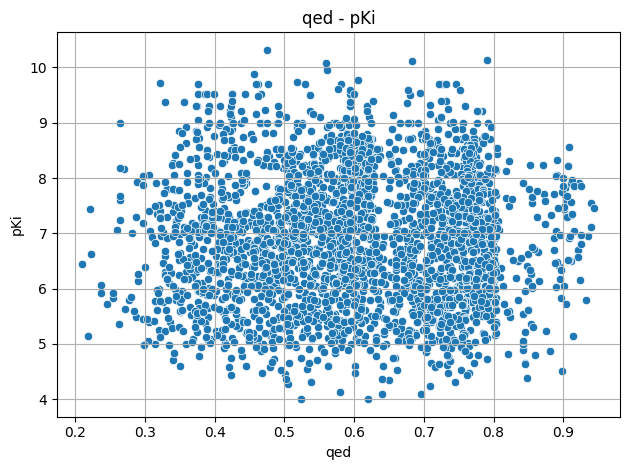

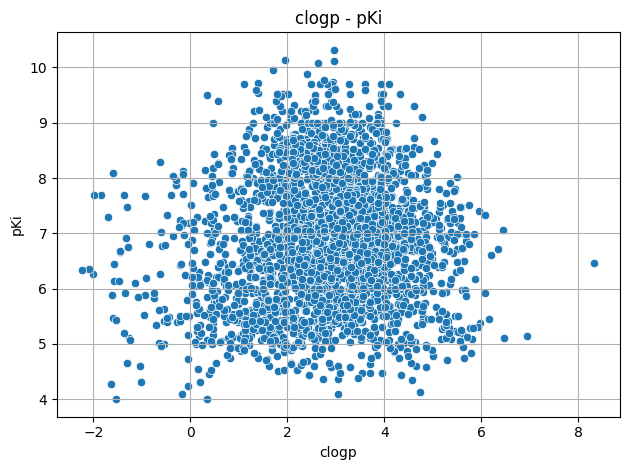

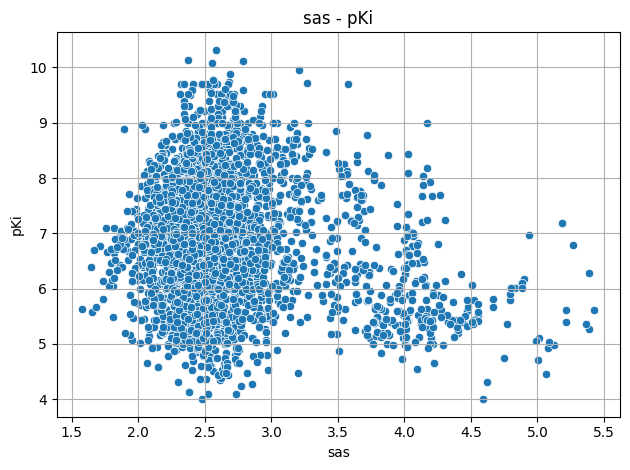

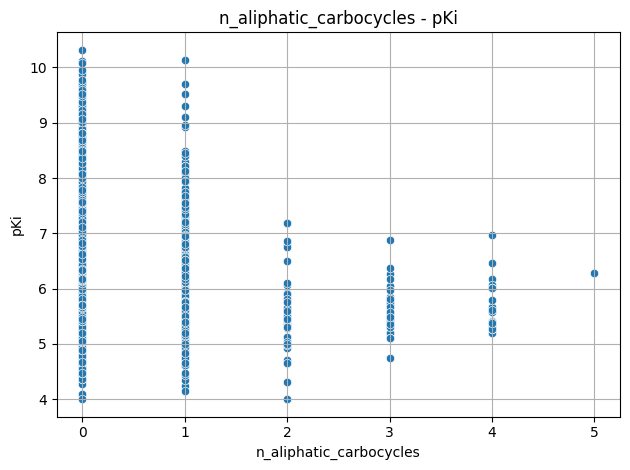

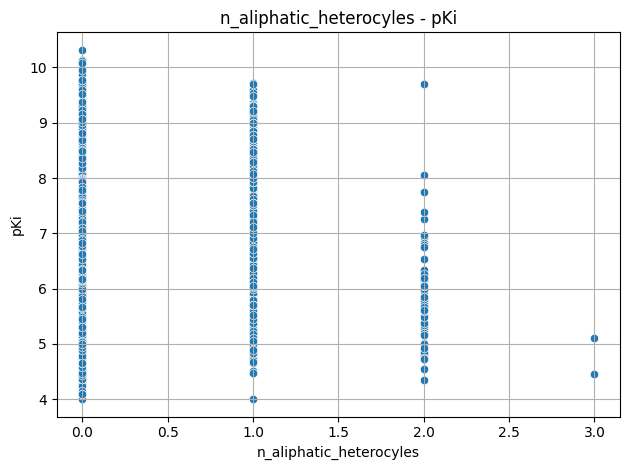

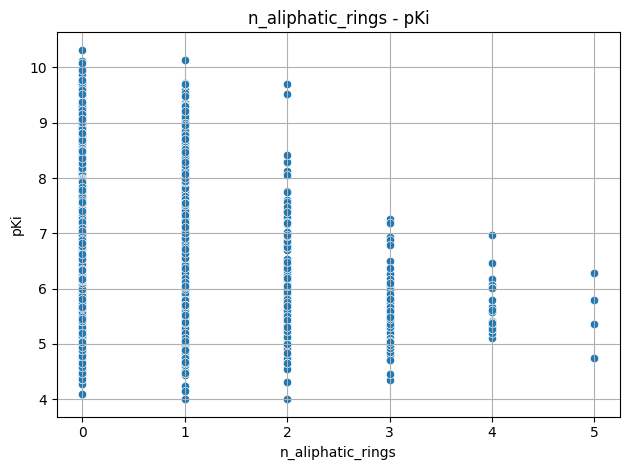

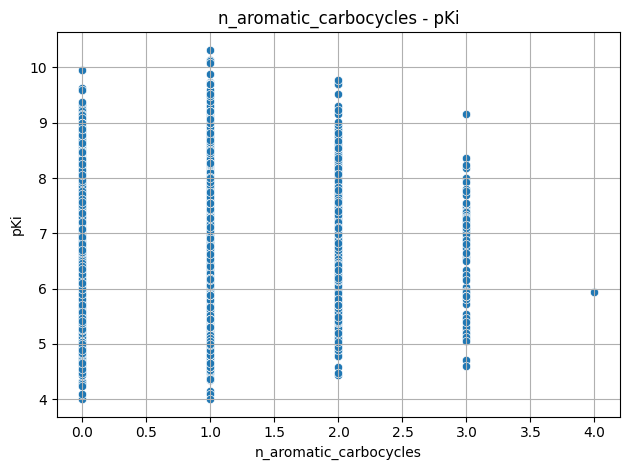

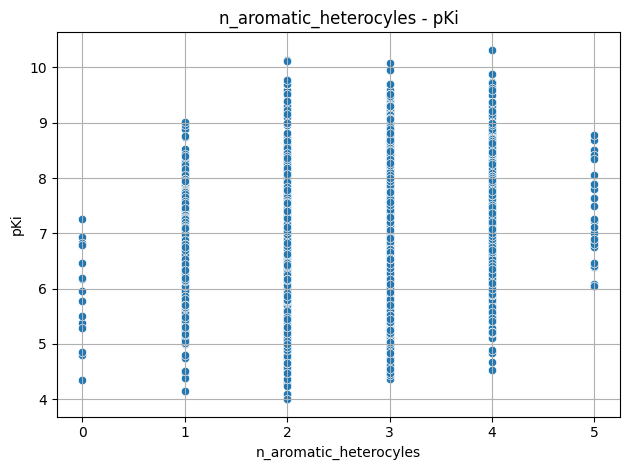

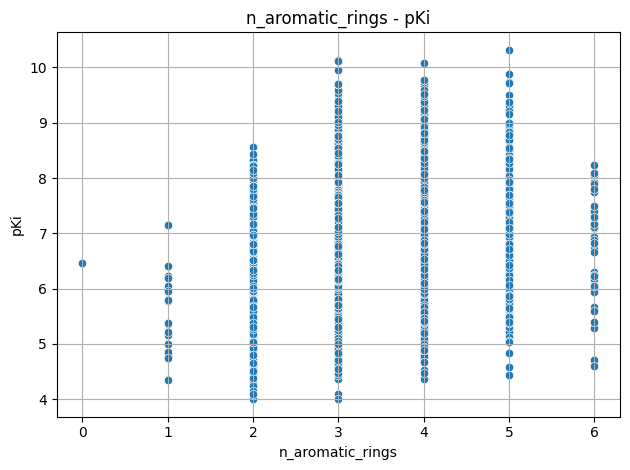

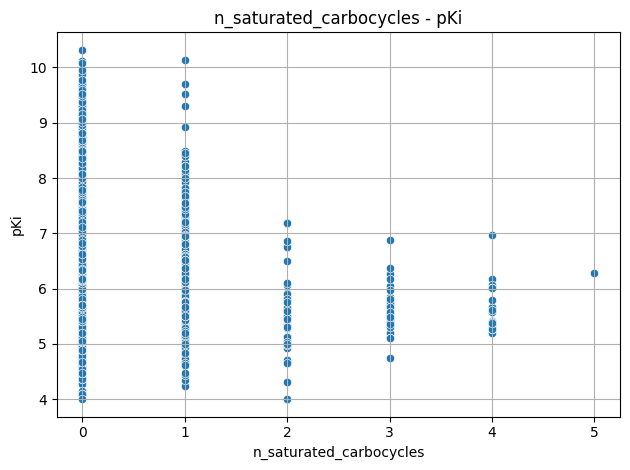

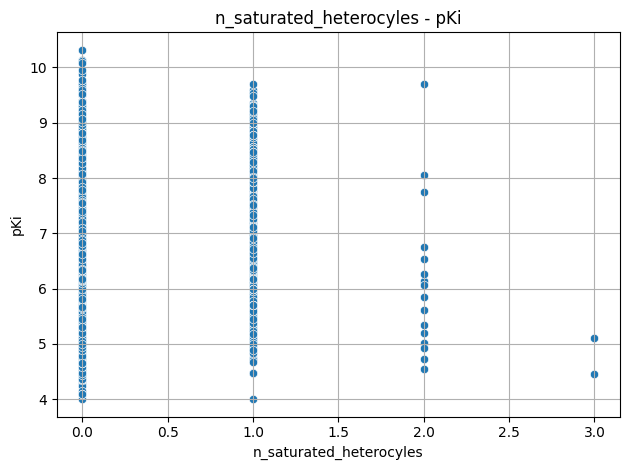

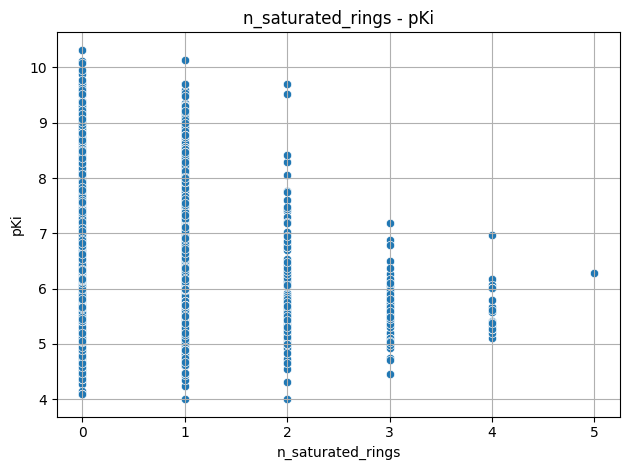

In [16]:
for num, name in enumerate(columns):
    plt.figure(num=num)
    sns.scatterplot(data=data, x=name, y='pKi')
    plt.grid()
    plt.title(f'{name} - pKi')
    plt.tight_layout()

In [17]:
n_columns = [col for col in columns if col.startswith('n_')]
n_columns

['n_lipinski_hba',
 'n_lipinski_hbd',
 'n_rings',
 'n_hetero_atoms',
 'n_heavy_atoms',
 'n_rotatable_bonds',
 'n_aliphatic_carbocycles',
 'n_aliphatic_heterocyles',
 'n_aliphatic_rings',
 'n_aromatic_carbocycles',
 'n_aromatic_heterocyles',
 'n_aromatic_rings',
 'n_saturated_carbocycles',
 'n_saturated_heterocyles',
 'n_saturated_rings']

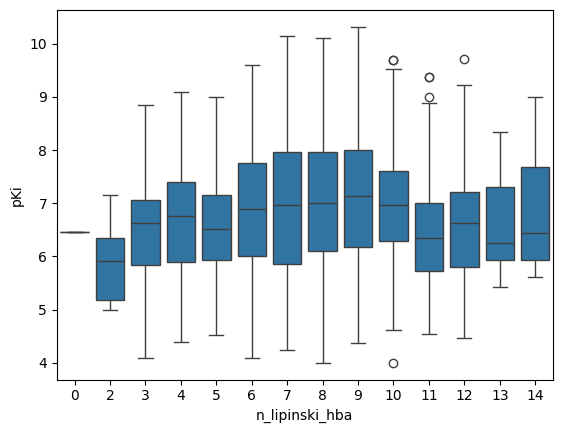

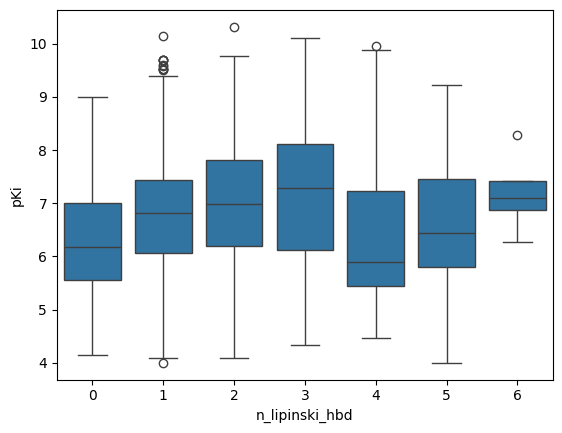

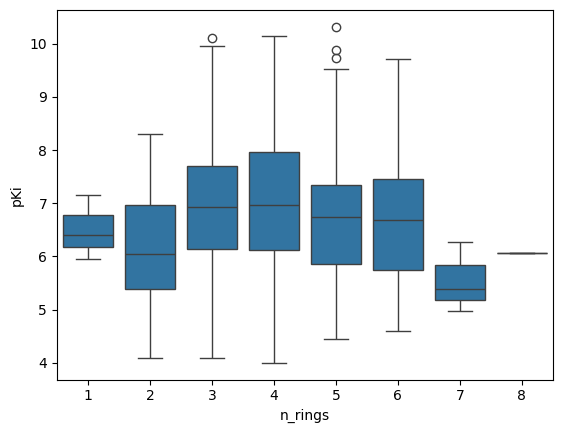

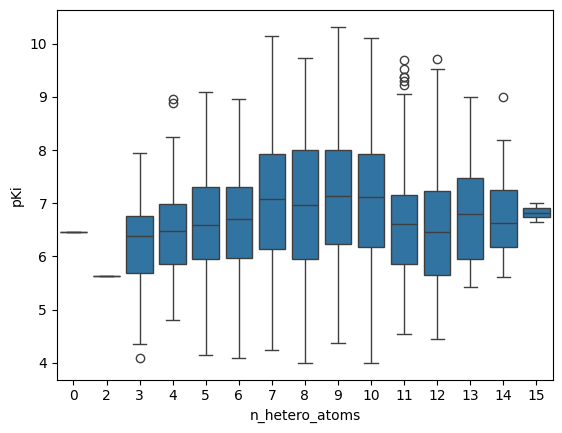

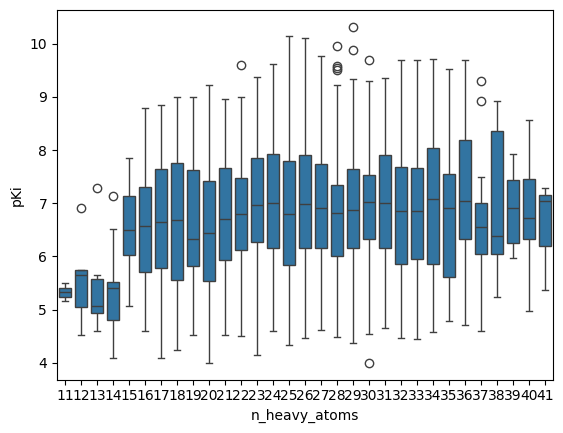

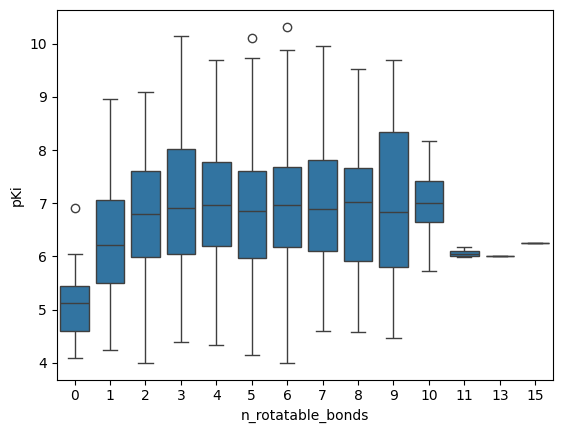

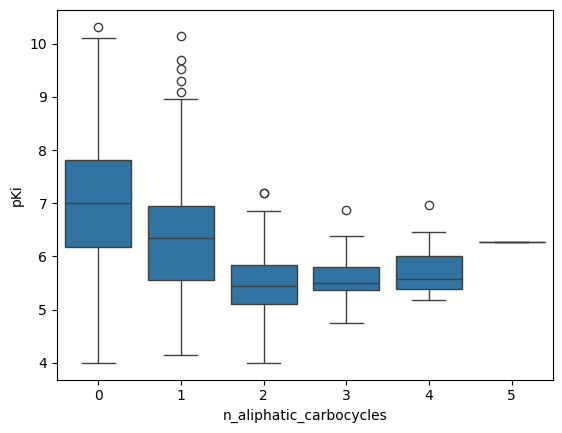

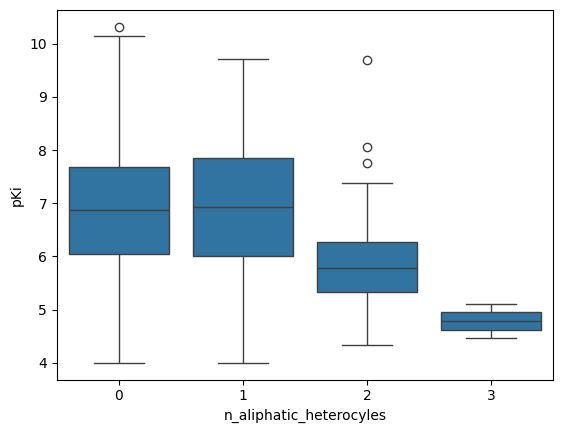

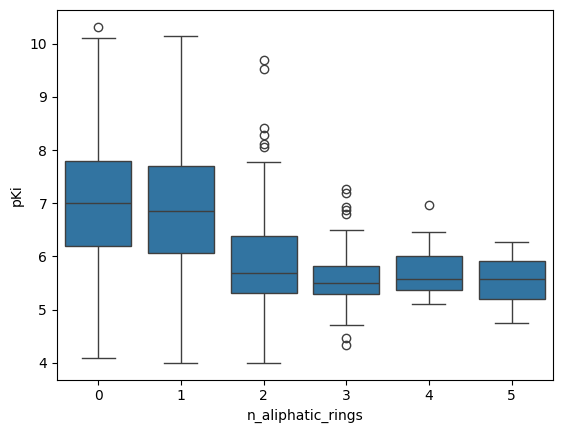

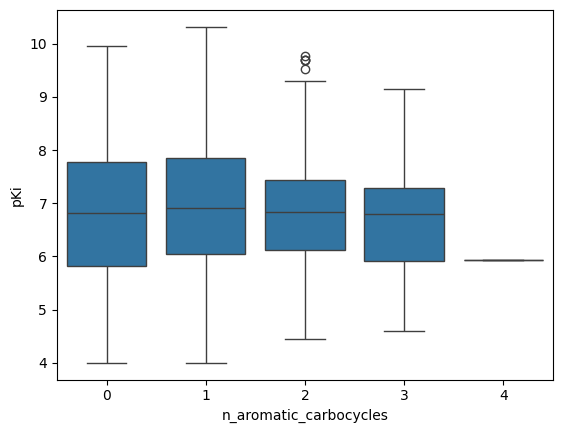

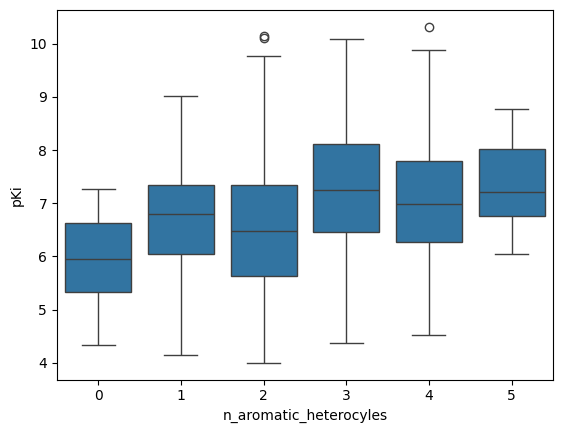

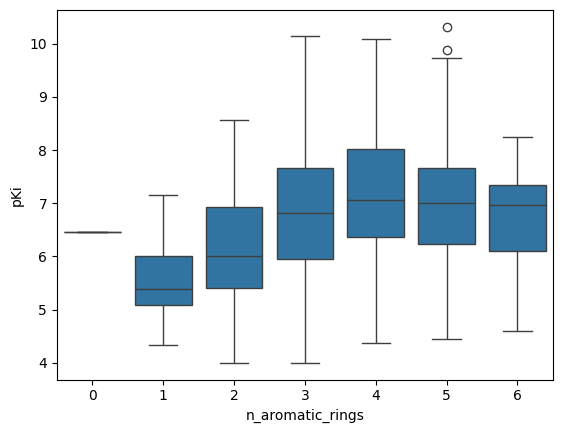

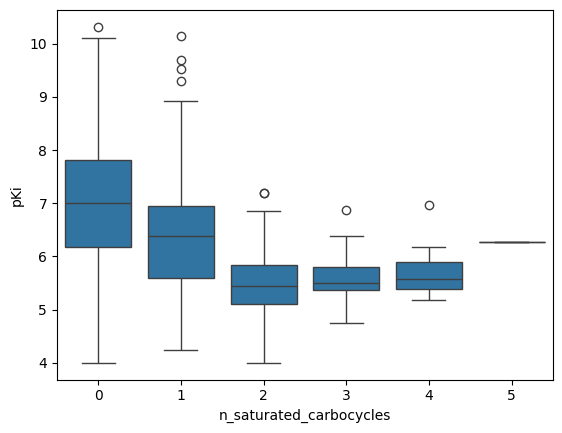

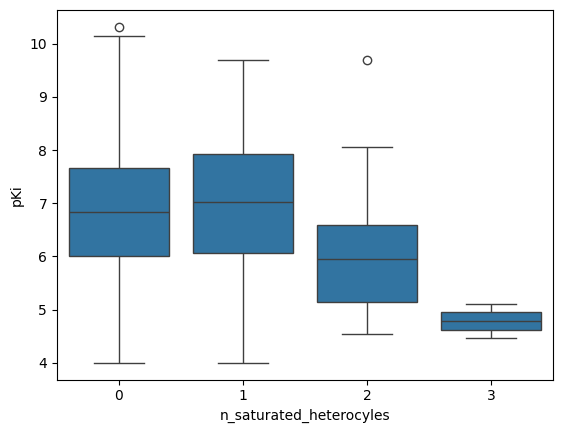

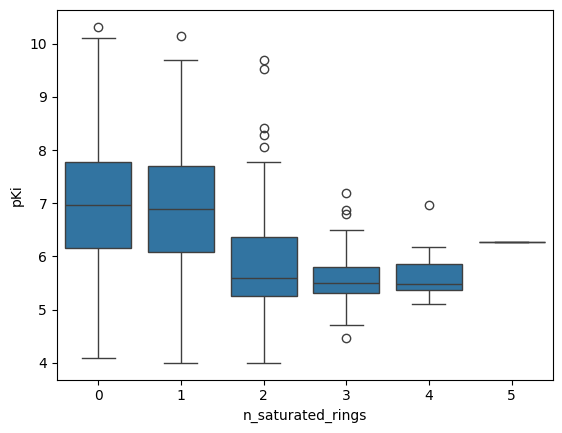

In [21]:
for num, name in enumerate(n_columns):
    plt.figure(num)
    sns.boxplot(data=data, x=name, y='pKi')


In [25]:
non_columns = [col for col in columns if not col.startswith('n_')]
non_columns.remove('mw')
non_columns

['fsp3', 'tpsa', 'qed', 'clogp', 'sas']

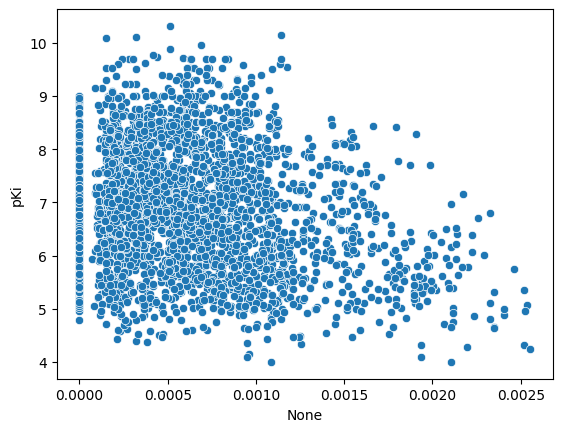

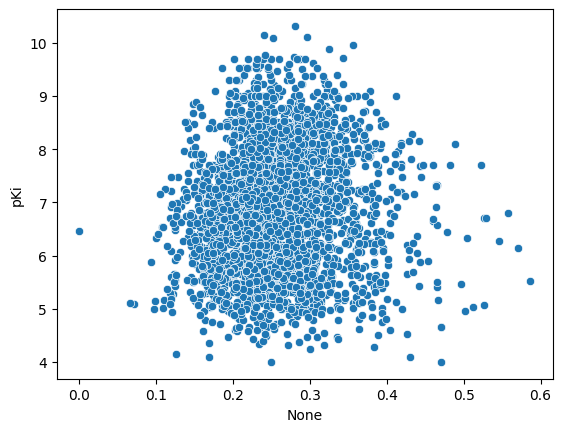

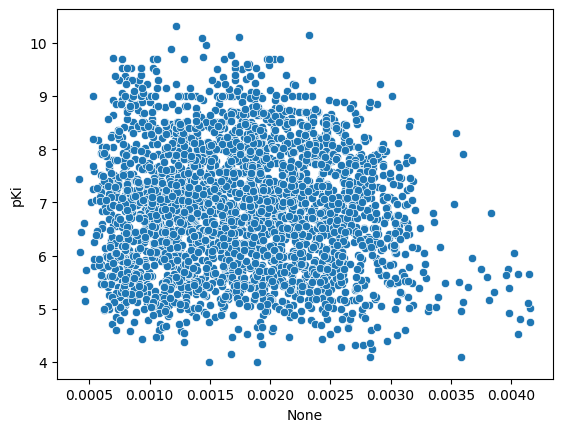

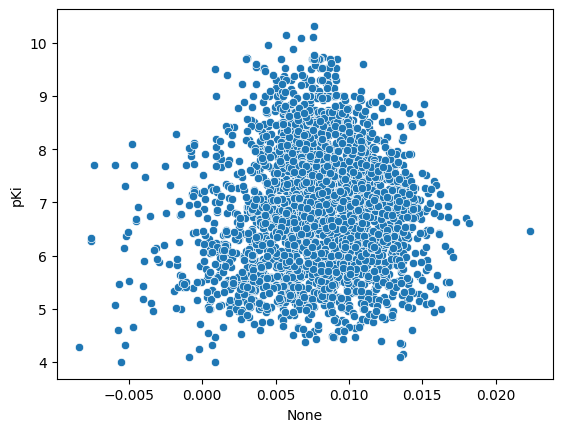

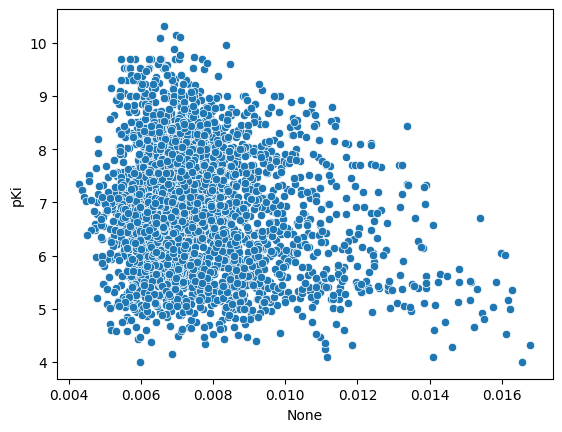

In [31]:
for num, name in enumerate(non_columns):
    plt.figure(num)
    x = data[name] / data['mw']
    sns.scatterplot(x=x, y=data['pKi'])

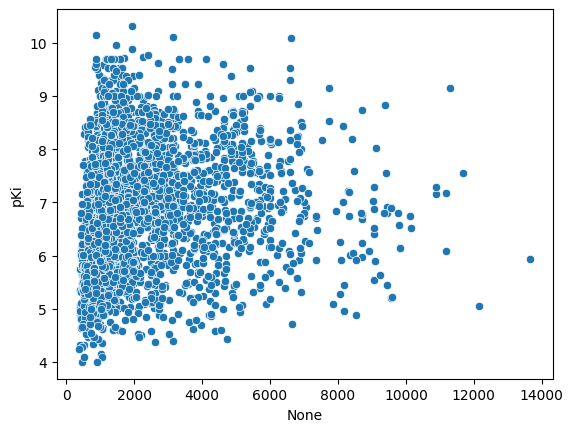

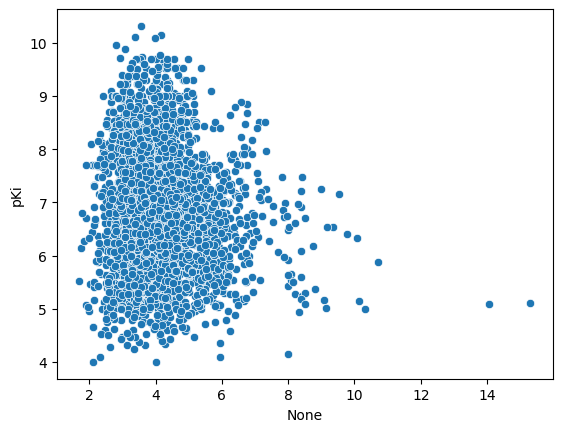

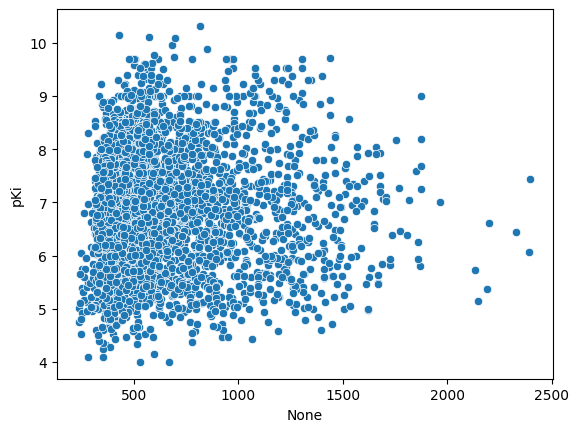

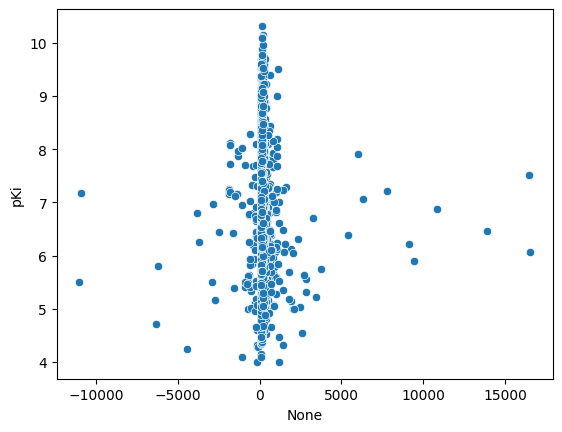

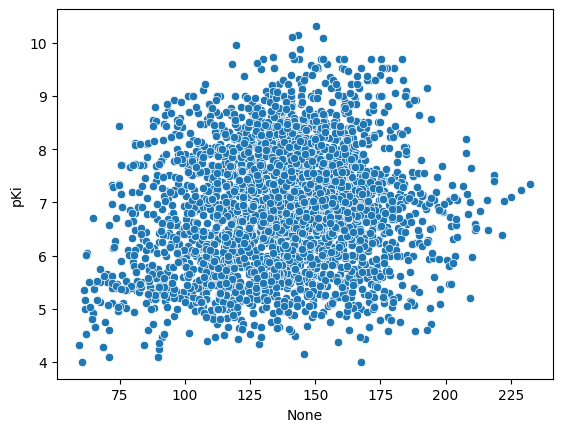

In [39]:
for num, name in enumerate(non_columns):
    plt.figure(num)
    x = data['mw'] / data[name]
    sns.scatterplot(x=x, y=data['pKi'])